## Analizing the Vanarabulity fixed commits dates and first release date that has Fix in it.

## Goals

- To Extract dates from SHDS and githubs. <br>
- Exploring the Data.<br>
        -Getting mean, median , mode, SD of the days( the number of days between the commit and release )<br>
        - Applying a Distribution Model ( Normal Distribution )<br>
        - Other tests
- Apply A ML Model.

In [4]:
import pandas as pa
import json
import datetime as dt
import glob

In [6]:
d = pa.to_datetime('Apr 18, 2009')

## Loading the software nearest release data which has fix in it.

The date is being retreaved from two named(data2.txt) file which contains hash's of the commit and rel_date in theam.


In [291]:
# d = dict()
# 
# with open('data2.txt','r') as f:
#     for line in f:
#         if len(line)>25:
# #             print(line)
#             if len(line.strip().split('[<'))>1:
#                 d[line.strip().split('[<')[0].split('\'')[1][-40:]] = line.strip().split('[<')[1].split('">')[1].split('<')[0]
        

In [23]:
# d[line.strip().split('[<')[0].split('\'')[1][-40:]] = line.strip().split('[<')[1].split('">')[1].split('<')[0]

'Jan 12, 2007'

In [45]:
df =pa.DataFrame({'index':list(d.keys()),'date':list(d.values())})

In [46]:
df['date'] = pa.to_datetime(df['date'])

In [47]:
df.columns = ['hash','rel_date']

In [39]:
df.to_csv('data2.csv')

In [48]:
df

,hash,rel_date
0,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,2009-04-18
1,7bd027914c5ffd36bb408ef47dc749de3b6e063a,2009-09-06
2,b9aae1e43eb2c8e989510187cff0ba3e996f9a4c,2009-10-22
3,bfe032858077bb2946abe25e95e485ba6da86bd5,2010-05-24
4,2abdf14620f146857dc8e3ffd2b6a754884c331d,2010-04-23
...,...,...
1628,863d37ea66d5c960db08d6f4a2cbd2518f0f80d1,2016-11-24
1629,6045de69c7dedcba3eadf7c4bba424b19c81d00d,2016-11-24
1630,b2af4e8868726a040234de113436c6e4f6372d17,2016-11-22
1631,a16ffc86eca15fca9e40607d41de3cea9cf868f1,2016-12-14


## Loading NVD dataset

In [44]:
file = '../../data/nvd-hashs/'
allcves = glob.glob(file+'*.csv')
allcves = glob.glob(file+'*.csv')
l = []
for filename in allcves:
    df = pa.read_csv(filename)
    l.append(df)
data = pa.concat(l, ignore_index=True)

## Merging NVD and Release datasets on commit Hashs

In [49]:
mg = pa.merge(data,df,on='hash')

In [289]:
mg.head()

,cveid,year,hash,desc,link,publishedDate,rel_date
0,1145,2009.0,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,Integer overflow in the pango_glyph_string_set...,http://github.com/bratsche/pango/commit/4de30e...,2009-05-11T15:30Z,2009-04-18
1,3177,2009.0,7bd027914c5ffd36bb408ef47dc749de3b6e063a,lib/thin/connection.rb in Thin web server befo...,http://github.com/macournoyer/thin/commit/7bd0...,2009-09-22T10:30Z,2009-09-06
2,3513,2009.0,b9aae1e43eb2c8e989510187cff0ba3e996f9a4c,The decode_entities function in util.c in HTML...,http://github.com/gisle/html-parser/commit/b9a...,2009-10-29T14:30Z,2009-10-22
3,4070,2009.0,bfe032858077bb2946abe25e95e485ba6da86bd5,Cross-site scripting (XSS) vulnerability in th...,http://github.com/rails/rails/commit/bfe032858...,2009-12-07T17:30Z,2010-05-24
4,4956,2009.0,2abdf14620f146857dc8e3ffd2b6a754884c331d,Cross-site scripting (XSS) vulnerability in ZM...,http://github.com/zopefoundation/Zope/commit/2...,2017-08-07T17:29Z,2010-04-23


In [1]:
link = 'http://github.com/bratsche/pango/commit/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e'

## Getting dates when the commits where pushed to fix the Vanarabulity.

In [ ]:
relative-time

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from lxml import html

url = link
page = html.fromstring(urlopen(url).read())
soup = BeautifulSoup(urlopen(url).read(), 'html.parser')

In [288]:
# from urllib.request import urlopen
# lt = list()
# ct=0
# for link in links:
# #     print('inside')
#     if type(link) != str:
#         continue
#     url = link[:7]+'api.'+link[7:18]+'repos/'+link[18:-41]+'s'+link[-41:]+'?client_id=fab412aea9ded394ff82&client_secret=f69fb6e9e105aabf3e3d2f651c30262838b7bb16'
#     try:
#         s = urlopen(url).read().decode()
#     except:
        
#         print(url)
#         continue
#         lt.append((url[-40:],'nan'))
#     l = json.loads(s.strip())
#     lt.append((url[-40:],l['commit']['author']['date']))
#     ct+=1
#     print(ct)

In [290]:
# https://api.github.com/repos/bratsche/pango/commits/4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e

In [7]:
links= data.link

In [ ]:
print('hi')

In [12]:
with open('commit-dates,txt','w') as f:
    for x in lt:
        f.write(str(x)+'\n')

In [ ]:
cd = dict()
ct=0
with open('commit-dates,txt','r') as f:
    for line in f:
        cd[ct]=line.split(',')[1].strip().split('\'')[1]
        ct+=1

comt = pa.DataFrame({'id':list(cd.keys()),'dates':list(cd.values())})

comt['dates'] = pa.to_datetime(comt['dates'])

comt['dates'] = comt['dates'].dt.date

In [87]:
comt.columns = ['index','commit-dates']
comt.set_index('index')

,commit-dates
index,
0,2009-03-02
1,2009-09-07
2,2009-08-12
3,2009-10-22
4,2009-11-17
...,...
5593,2012-04-26
5594,2012-06-20
5595,2012-01-06


In [285]:
full = pa.merge(mg,comt)

In [60]:
full[['cveid','rel_date','commit-dates']]

,cveid,rel_date,commit-dates
0,1145,2009-04-18,2013-08-13
1,190,2015-12-10,2015-07-13
2,191,2015-12-10,2015-06-26
3,192,2015-12-10,2015-06-27
4,217,2015-03-05,2015-05-07
...,...,...,...
387,2273,2013-03-17,2016-10-20
388,2274,2013-03-17,2016-10-20
389,2284,2013-05-09,2016-08-31
390,2354,2013-05-27,2016-01-07


In [69]:
full['rel_date'] = full['rel_date'].dt.date

In [66]:
type(full['rel_date'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
full = pa.merge(mg,comt,on='cveid')
diff = mg['rel_date'].dt.date-comt['commit-dates']

## Trying to fit normal Distribution

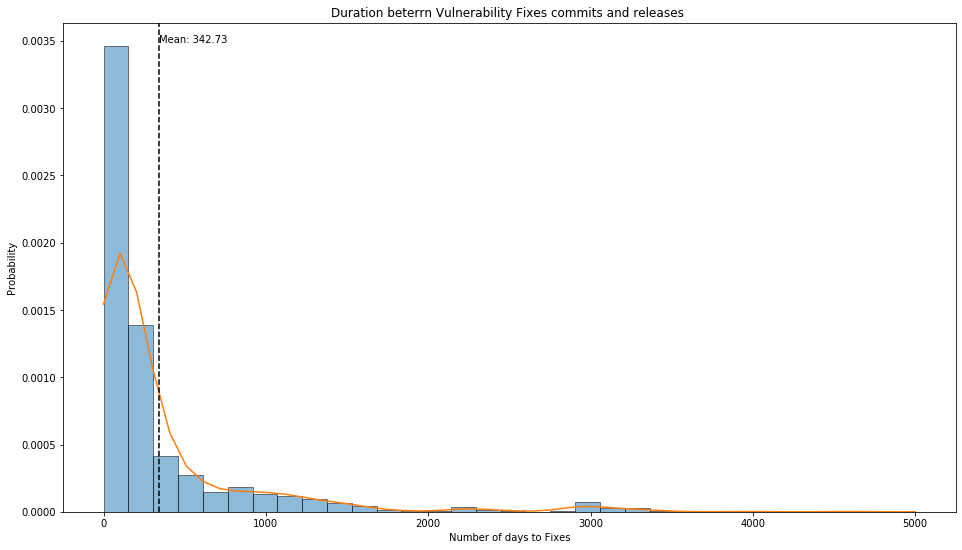

In [287]:
from scipy.stats import kde
from scipy.stats import norm
import scipy.stats as stats

# d = pa.DataFrame({'rel':mg['rel_date'].dt.date,'commit':comt['commit-dates'],'diff':diff})

# d = d[:2000]
t = d[d['diff'].dt.days>-1]['diff'].dt.days

plt.rcParams["figure.figsize"] = [16,9]
m,std = norm.fit(t)
median = t.median()

plt.hist(t, alpha=0.5, bins=30, density=True, ec='black')
xvals = np.linspace(0, 5000)
density = kde.gaussian_kde(t, bw_method=None)
xgrid = np.linspace(xvals.min(), xvals.max(), 100)
plt.plot(xvals, density(xvals))
min_ylim, max_ylim = plt.ylim()
plt.axvline(m, color='black', linestyle='dashed')
plt.text(m, max_ylim*0.96, 'Mean: {:.2f}'.format(m))
plt.title('Duration beterrn Vulnerability Fixes commits and releases ')
plt.xlabel('Number of days to Fixes')
plt.ylabel('Probability')
plt.show()



## Values of Mean, Median, Standerd Deviation

In [269]:
m # Mean Value

379.47185430463577

In [271]:
std # Standerd Devation

623.8384670591051

In [272]:
median # Median

135.0

## Identifing the problem with the Distribution

In general normal distribution there should be atlease some form of bell curve but ranter than seeing we can <br>
observer that the data is more leand to right side. <br>
So there are two possibilitys to go wrong.<br> 1. Data is in correct <br> 2. Wrong selection of stribution.<br>
Some the days values which is a difference between the release date and commit date are negatice <br>
If the days values are ploted then we can see that clearly.

## Visuvalizing the days values.

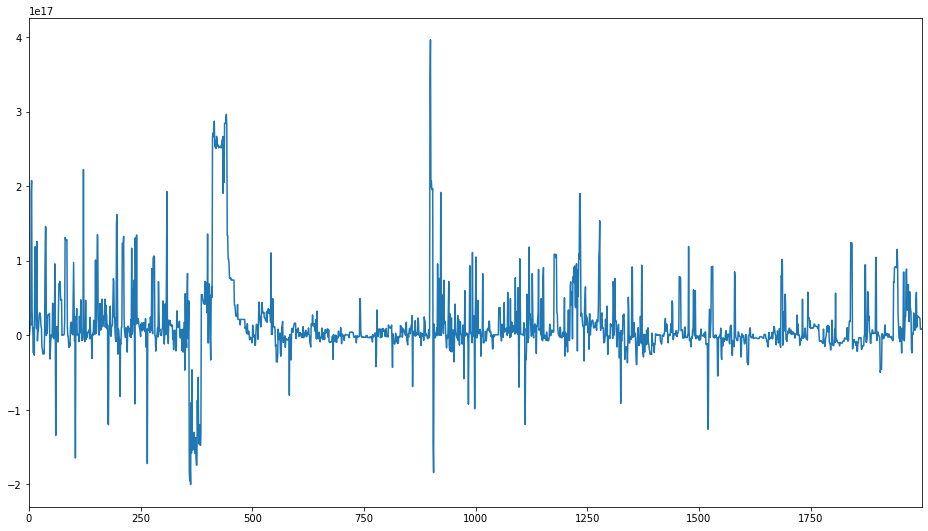

In [111]:
diff[:2000].plot(figsize=(16,9))

## Obeserved negative values

There should not be a negitve days which is not possible in real world<br>


In [274]:
s = pa.DataFrame(diff)
s.columns = ['diff']
s['diff'] = s['diff'].dt.days
s = s[:2000]
# s[s['diff']>-1]

### Ploting only postive values

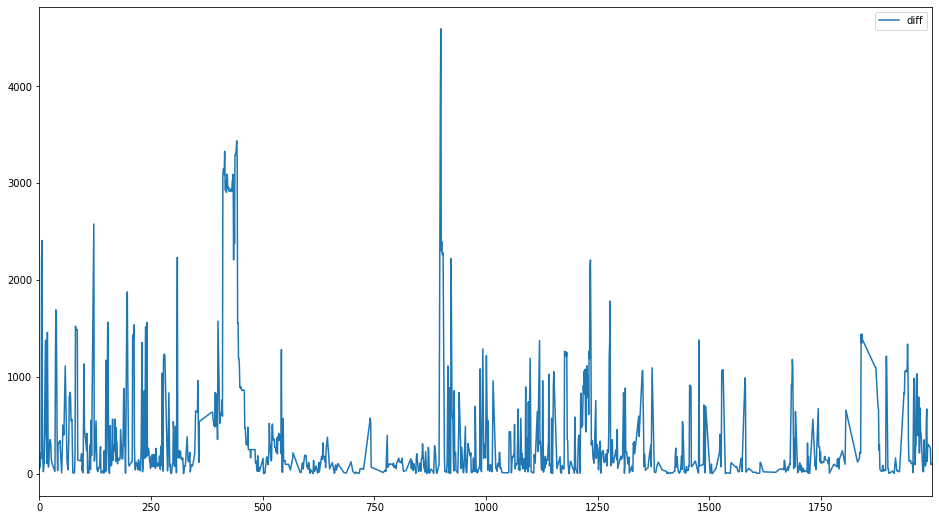

In [149]:
s[s['diff']>-1].plot(figsize=(16,9))

In [280]:
pos = s[s['diff']>-1].count()

In [279]:
neg = s[s['diff']<0].count()

## More than 1/3 of the values are negative

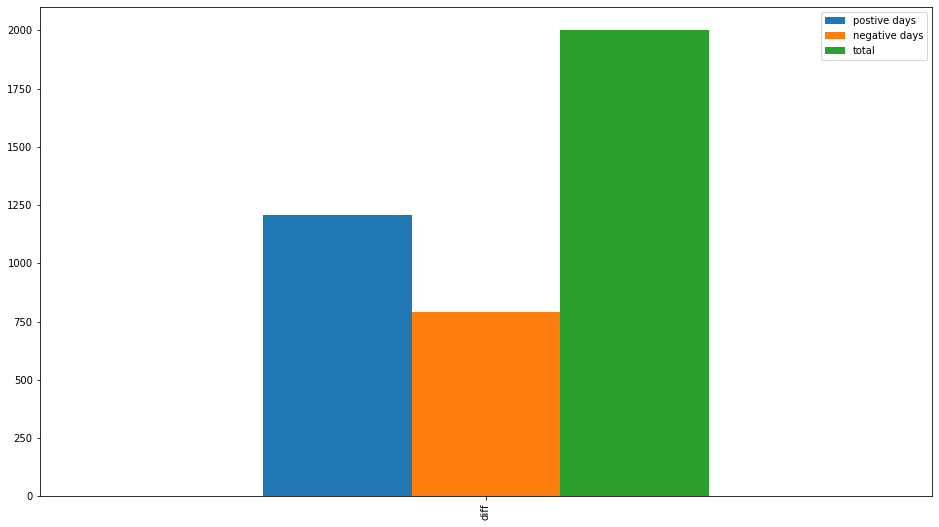

In [284]:
pa.DataFrame({'postive days':pos,'negative days':neg,'total':len(s)}).plot(kind='bar')